# Boston Housing Prices

In [54]:
"""
Loading the boston dataset and examining its target (label) distribution.
"""

# Load libraries
import numpy as np
import pylab as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import cross_validation, svm, grid_search
from sklearn.metrics import make_scorer, mean_absolute_error
%matplotlib inline

def load_data():
	'''Load the Boston dataset.'''

	boston = datasets.load_boston()
	return boston


def explore_city_data(city_data):
	'''Calculate the Boston housing statistics.'''

	# Get the labels and features from the housing data
	housing_prices = city_data.target
	housing_features = city_data.data

	print "Data Size: ", housing_prices.size
	print "Number of features: ", housing_features.size, housing_features.shape
	print "Minimum (thousands): ", np.min(housing_prices)
	print "Maximum (thousands): ", np.max(housing_prices)
	print "Mean (thousands): ", np.mean(housing_prices)
	print "Median (thousands): ", np.median(housing_prices)
	print "Standard Deviation (thousands): ", np.std(housing_prices)

def performance_metric(label, prediction):
	'''Calculate and return the appropriate performance metric.'''
	# http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
	mae = mean_absolute_error(label, prediction)
	return mae

def split_data(city_data):
	'''Randomly shuffle the sample set. Divide it into training and testing set.'''

	# Get the features and labels from the Boston housing data
	X, y = city_data.data, city_data.target

	X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4)

	return X_train, y_train, X_test, y_test


def learning_curve(depth, X_train, y_train, X_test, y_test):
	'''Calculate the performance of the model after a set of training data.'''

	# We will vary the training set size so that we have 50 different sizes
	sizes = np.linspace(1, len(X_train), 50)
	train_err = np.zeros(len(sizes))
	test_err = np.zeros(len(sizes))

	print "Decision Tree with Max Depth: "
	print depth
	# pdb.set_trace()
	for i, s in enumerate(sizes):

		# Create and fit the decision tree regressor model
		regressor = DecisionTreeRegressor(max_depth=depth)
		regressor.fit(X_train[:s], y_train[:s])

		# Find the performance on the training and testing set
		train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
		test_err[i] = performance_metric(y_test, regressor.predict(X_test))


	# Plot learning curve graph
	learning_curve_graph(sizes, train_err, test_err)


def learning_curve_graph(sizes, train_err, test_err):
	'''Plot training and test error as a function of the training size.'''

	pl.figure()
	pl.title('Decision Trees: Performance vs Training Size')
	pl.plot(sizes, test_err, lw=2, label = 'test error')
	pl.plot(sizes, train_err, lw=2, label = 'training error')
	pl.legend()
	pl.xlabel('Training Size')
	pl.ylabel('Error')
	pl.show()

def model_complexity(X_train, y_train, X_test, y_test):
	'''Calculate the performance of the model as model complexity increases.'''

	print "Model Complexity: "

	# We will vary the depth of decision trees from 2 to 25
	max_depth = np.arange(1, 25)
	train_err = np.zeros(len(max_depth))
	test_err = np.zeros(len(max_depth))

	for i, d in enumerate(max_depth):
		# Setup a Decision Tree Regressor so that it learns a tree with depth d
		regressor = DecisionTreeRegressor(max_depth=d)

		# Fit the learner to the training data
		regressor.fit(X_train, y_train)

		# Find the performance on the training set
		train_err[i] = performance_metric(y_train, regressor.predict(X_train))

		# Find the performance on the testing set
		test_err[i] = performance_metric(y_test, regressor.predict(X_test))

	# Plot the model complexity graph
	model_complexity_graph(max_depth, train_err, test_err)


def model_complexity_graph(max_depth, train_err, test_err):
	'''Plot training and test error as a function of the depth of the decision tree learn.'''

	pl.figure()
	pl.title('Decision Trees: Performance vs Max Depth')
	pl.plot(max_depth, test_err, lw=2, label = 'test error')
	pl.plot(max_depth, train_err, lw=2, label = 'training error')
	pl.legend()
	pl.xlabel('Max Depth')
	pl.ylabel('Error')
	pl.show()


def fit_predict_model(city_data):
	'''Find and tune the optimal model. Make a prediction on housing data.'''

	# Get the features and labels from the Boston housing data
	X, y = city_data.data, city_data.target

	# Setup a Decision Tree Regressor
	regressor = DecisionTreeRegressor()

	parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}


	# 1. Finding the best performance metric
	# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
	scorer = make_scorer(performance_metric, greater_is_better=False)

	# 2. Using gridearch to fine tune the Decision Tree Regressor and find the best model
	# http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV
	reg = grid_search.GridSearchCV(regressor, parameters, scoring=scorer)

	# Fit the learner to the training data
	print "Final Model: "
	print reg.fit(X, y)

    # Use the model to predict the output of a particular sample
	x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]
	y = reg.predict(x)
	# print reg.best_params_
	print "House: " + str(x)
	print "Prediction: " + str(y)

In [55]:
	'''Analyze the Boston housing data.'''

	# Load data
	city_data = load_data()

	# Explore the data
	explore_city_data(city_data)

Data Size:  506
Number of features:  6578 (506, 13)
Minimum (thousands):  5.0
Maximum (thousands):  50.0
Mean (thousands):  22.5328063241
Median (thousands):  21.2
Standard Deviation (thousands):  9.18801154528


Decision Tree with Max Depth: 
1


/home/judy/.local/lib/python2.7/site-packages/ipykernel/__main__.py:68: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/judy/.local/lib/python2.7/site-packages/ipykernel/__main__.py:71: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


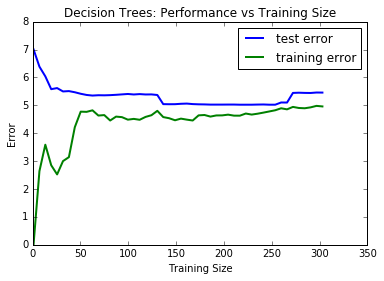

Decision Tree with Max Depth: 
2


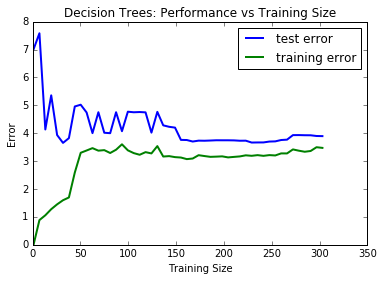

Decision Tree with Max Depth: 
3


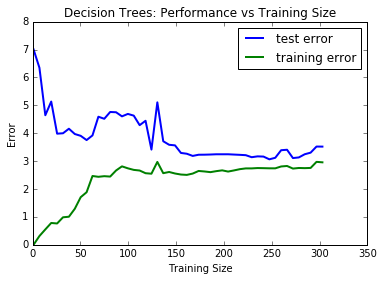

Decision Tree with Max Depth: 
4


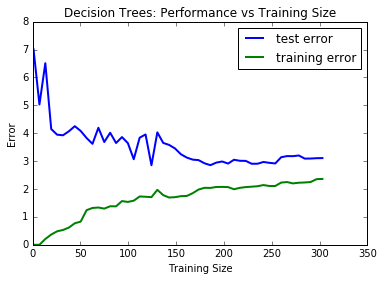

Decision Tree with Max Depth: 
5


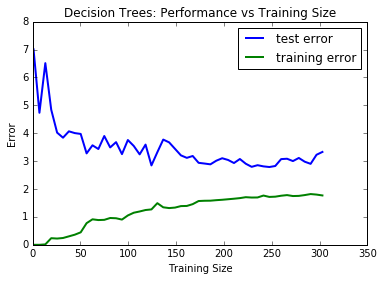

Decision Tree with Max Depth: 
6


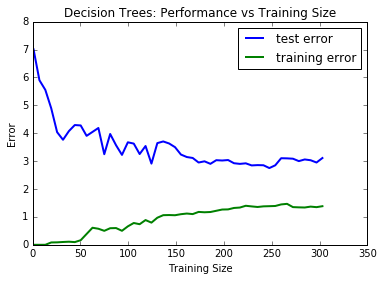

Decision Tree with Max Depth: 
7


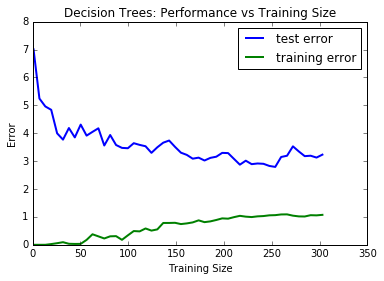

Decision Tree with Max Depth: 
8


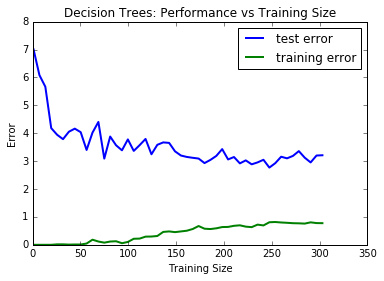

Decision Tree with Max Depth: 
9


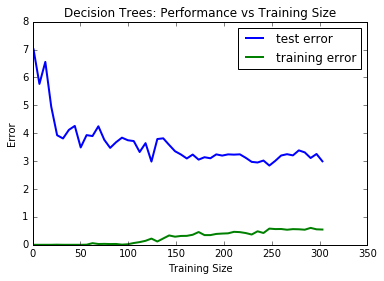

Decision Tree with Max Depth: 
10


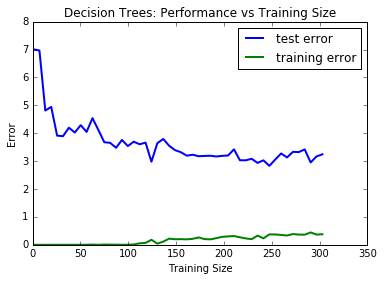

As training size increases, training error increases and the testing error decreases. /n
With a max depth of 1, the model suffers high bias since the error is high, but the gap between the training and testing curves is small. With a max depth of 10, there is high variance since the gap between testing and training errors is large. /n


In [72]:
	'''Evaluate and validate the performanance of a Decision Tree regressor on the Boston data.'''
	# Training/Test dataset split
	X_train, y_train, X_test, y_test = split_data(city_data)

    
	# Learning Curve Graphs
	max_depths = [1,2,3,4,5,6,7,8,9,10]
	for max_depth in max_depths:
		learning_curve(max_depth, X_train, y_train, X_test, y_test)

	print("As training size increases, training error increases and the testing error decreases. /n")
    
	print("With a max depth of 1, the model suffers high bias since the error is high, but the "
	"gap between the training and testing curves is small. With a max depth of 10, "
	"there is high variance since the gap between testing and training errors is large. /n")
    
    

Model Complexity: 


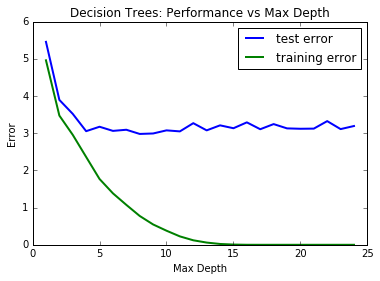

With increasing complexity, the training and testing errors decrease. A max depth of 6 best generalizes the dataset since that is where the testing error plateaus. The training error still decreases with increasing complexity, but the testing error does not improve. 



In [73]:
	# Model Complexity Graph
	model_complexity(X_train, y_train, X_test, y_test)
	print("With increasing complexity, the training and testing errors decrease. " 
	"A max depth of 6 best generalizes the dataset since that is where the testing " 
	"error plateaus. The training error still decreases with increasing complexity, " 
	"but the testing error does not improve. \n")

In [58]:
	'''Fine tune the model to make prediction on unseen data.'''
	# Tune and predict Model
	fit_predict_model(city_data)


Final Model: 
GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(performance_metric, greater_is_better=False),
       verbose=0)
House: [11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]
Prediction: [ 20.96776316]
